### Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the data

In [45]:
advertiser = pd.read_csv('thirdauth_advertiser.csv')
episode_advertiser = pd.read_csv('thirdauth_episodeadvertiser.csv')

### Percentage of ads by type

<Axes: ylabel='count'>

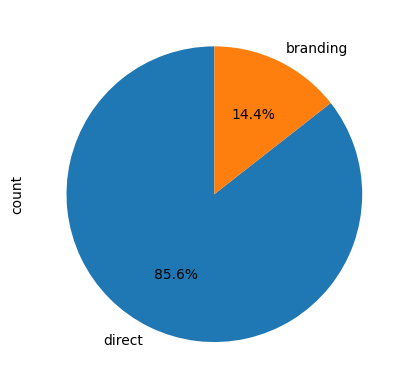

In [46]:
direct_vs_brands = episode_advertiser['advertiser_type'].value_counts()
direct_vs_brands.plot(kind='pie', autopct='%1.1f%%', startangle=90)

### Ad Read Type

<Axes: ylabel='count'>

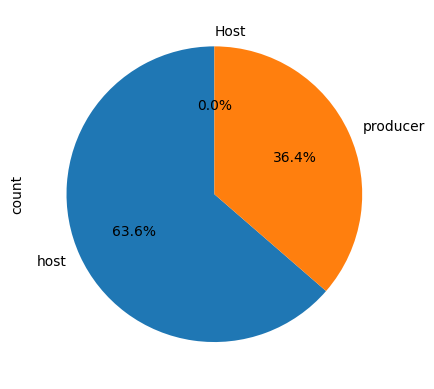

In [47]:
host_vs_producer = episode_advertiser['read_type'].value_counts()
host_vs_producer.plot(kind='pie', autopct='%1.1f%%', startangle=90)


<Axes: xlabel='advertiser_type'>

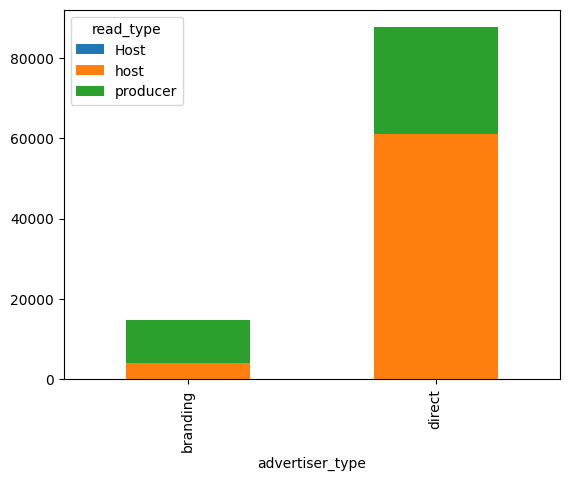

In [48]:
episode_advertiser.groupby(['advertiser_type', 'read_type']).size().unstack().plot(kind='bar', stacked=True)


#### From the above graph we can see that even though we have more advertiser_types that are direct a smaller percentage of them are producer. That means if a advertiser_type is direct they are more likely to be the host whereas if the advertiser_type is branding they are more likely to be producer.

### Placement Type

In [49]:
epi_adv = episode_advertiser[['placement_unit', 'read_type']]
epi_adv = epi_adv.dropna()
epi_adv = pd.get_dummies(epi_adv, columns=['read_type', 'placement_unit'])
epi_adv

,read_type_host,read_type_producer,placement_unit_MID,placement_unit_POST,placement_unit_PRE
1,True,False,True,False,False
2,True,False,True,False,False
3,True,False,True,False,False
4,True,False,True,False,False
5,True,False,True,False,False
...,...,...,...,...,...
135359,True,False,True,False,False
135360,False,True,True,False,False
135361,True,False,False,False,True
135363,True,False,True,False,False


<Axes: >

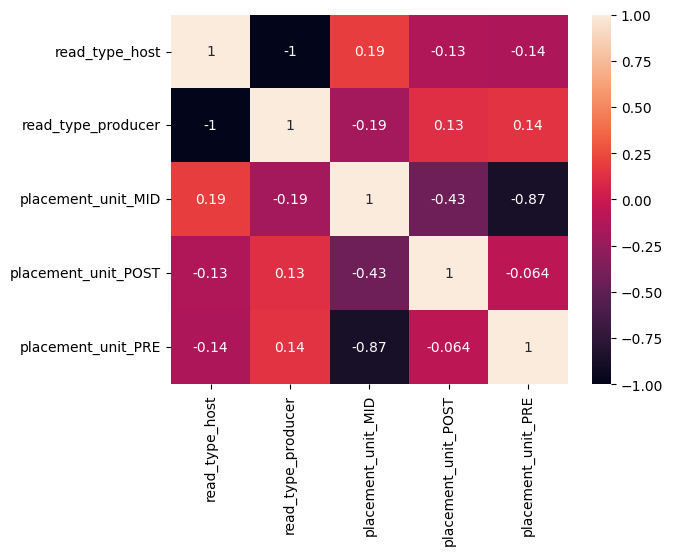

In [50]:
# plot correlation matrix

sns.heatmap(epi_adv.corr(), annot=True)

#### The above heatmap suggests that Host readings are slightly more likely with MID placements.
#### The producer readings are slightly more likely to be PRE placements.
#### Finally, that also the producer readings are more likely to be POST than the host readings.

In [51]:
epi = episode_advertiser[['placement_unit', 'advertiser_type']]
epi = epi.dropna()

epi = pd.get_dummies(epi, columns=['placement_unit', 'advertiser_type'])
epi


,placement_unit_MID,placement_unit_POST,placement_unit_PRE,advertiser_type_branding,advertiser_type_direct
1,True,False,False,False,True
2,True,False,False,False,True
3,True,False,False,False,True
4,True,False,False,False,True
5,True,False,False,False,True
...,...,...,...,...,...
135359,True,False,False,False,True
135360,True,False,False,False,True
135361,False,False,True,False,True
135363,True,False,False,False,True


<Axes: >

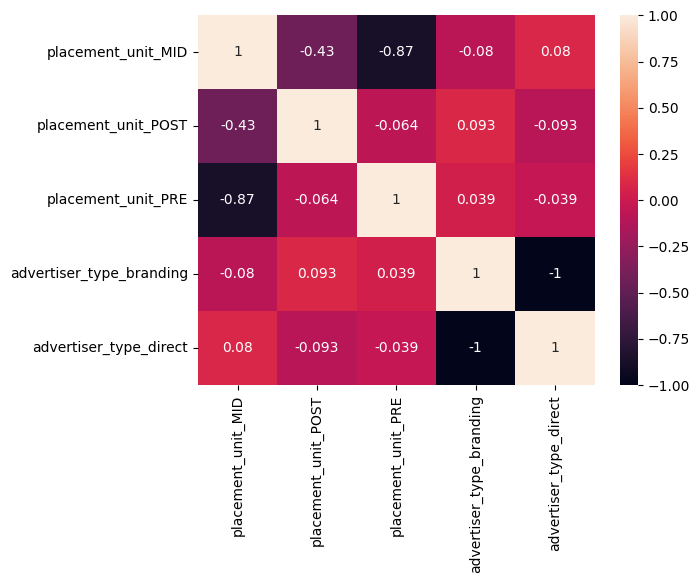

In [52]:
# plot correlation matrix

sns.heatmap(epi.corr(), annot=True)

#### From the above heatmap we can tell the advertisers irrespective of the type are more likely to have POST placement, followed by PRE placement and least likely to have MID placement.